In [1]:
import pandas as pd

In [2]:
#Load the dataset
df = pd.read_excel("nyagatare_weather_2019_2023.xlsx")
df.head()

,Date,Min_Temp_C,Max_Temp_C,Rainfall_mm,Humidity_%
0,2019-01-01,18.7,30.7,2.0,53.3
1,2019-01-02,18.5,31.6,1.8,66.1
2,2019-01-03,17.3,32.1,0.3,56.6
3,2019-01-04,16.6,25.8,0.5,65.7
4,2019-01-05,16.5,31.6,0.5,55.8


In [3]:
#Inspecting dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1826 non-null   datetime64[ns]
 1   Min_Temp_C   1826 non-null   float64       
 2   Max_Temp_C   1826 non-null   float64       
 3   Rainfall_mm  1826 non-null   float64       
 4   Humidity_%   1826 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.5 KB


In [4]:
#Add new Columns from Column named Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [5]:
df.head()

,Date,Min_Temp_C,Max_Temp_C,Rainfall_mm,Humidity_%,Year,Month
0,2019-01-01,18.7,30.7,2.0,53.3,2019,1
1,2019-01-02,18.5,31.6,1.8,66.1,2019,1
2,2019-01-03,17.3,32.1,0.3,56.6,2019,1
3,2019-01-04,16.6,25.8,0.5,65.7,2019,1
4,2019-01-05,16.5,31.6,0.5,55.8,2019,1


In [6]:
#Average values per year
Annual_summary = df.groupby('Year')[['Min_Temp_C', 'Max_Temp_C', 'Rainfall_mm', 'Humidity_%']].mean()
Annual_summary

,Min_Temp_C,Max_Temp_C,Rainfall_mm,Humidity_%
Year,,,,
2019,19.117808,30.020274,2.626301,67.621096
2020,18.947268,30.139071,2.647268,67.203825
2021,19.010685,29.939452,2.667123,67.457808
2022,18.977260,29.966849,2.973973,66.786849
2023,19.055616,29.789315,2.837260,67.043288


In [7]:
#Average values per month
Monthly_summary = df.groupby('Month')[['Min_Temp_C', 'Max_Temp_C', 'Rainfall_mm', 'Humidity_%']].mean()
Monthly_summary

,Min_Temp_C,Max_Temp_C,Rainfall_mm,Humidity_%
Month,,,,
1,18.031613,30.880645,1.537419,59.371613
2,18.039716,30.888652,1.248936,60.560993
3,19.984516,29.052903,4.112903,75.172258
4,19.824000,29.273333,4.161333,74.805333
5,20.241290,29.074194,4.023871,74.727097
6,18.060667,30.748667,1.263333,59.292000
7,17.994194,30.877419,1.294839,59.922581
8,18.020000,31.041290,1.581935,59.634194
9,19.930667,29.077333,3.948000,74.764667


In [8]:
import matplotlib.pyplot as plt


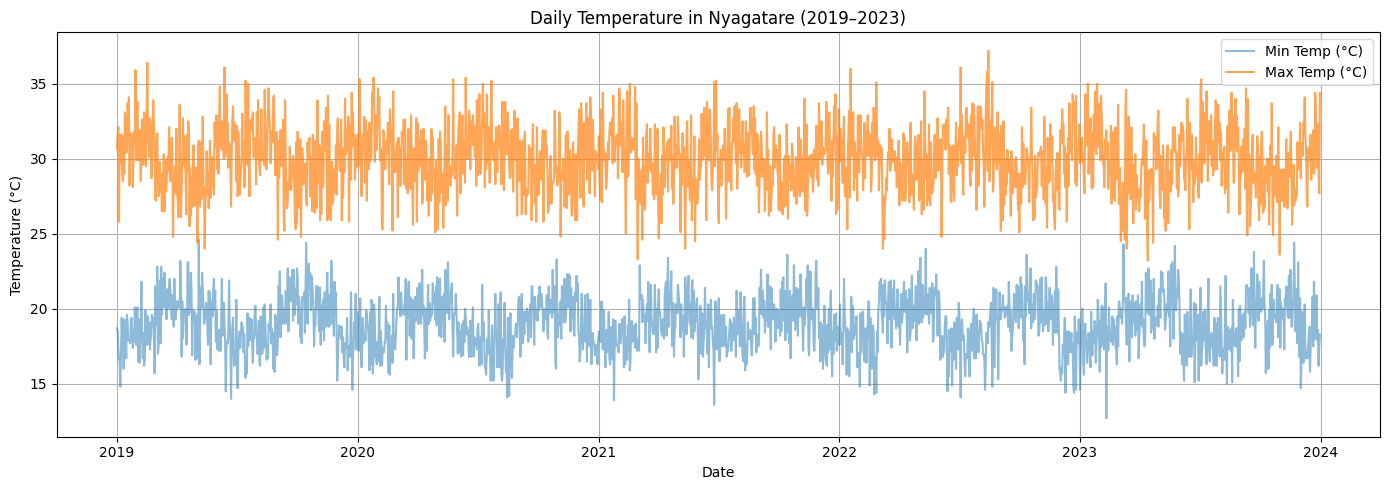

In [9]:
#Daily Temperature in Nyagatare (2019-2023)
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Min_Temp_C'], label='Min Temp (°C)', alpha=0.5)
plt.plot(df['Date'], df['Max_Temp_C'], label='Max Temp (°C)', alpha=0.7)
plt.title('Daily Temperature in Nyagatare (2019–2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


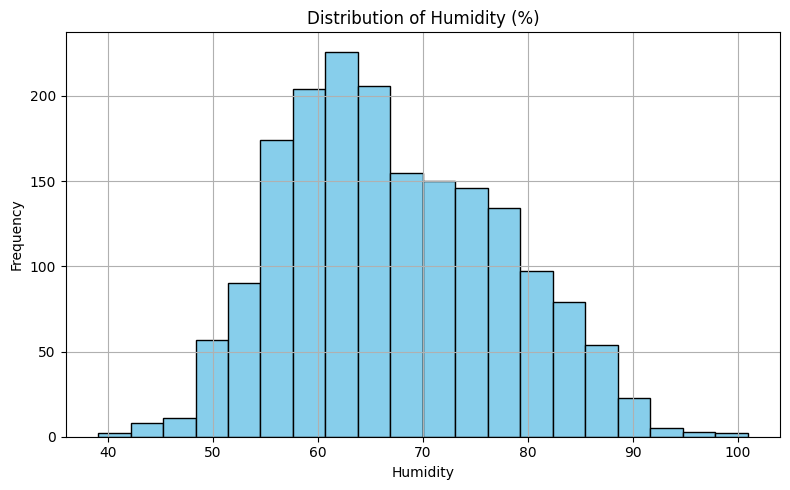

In [10]:
#Humidity distribution(Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df['Humidity_%'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


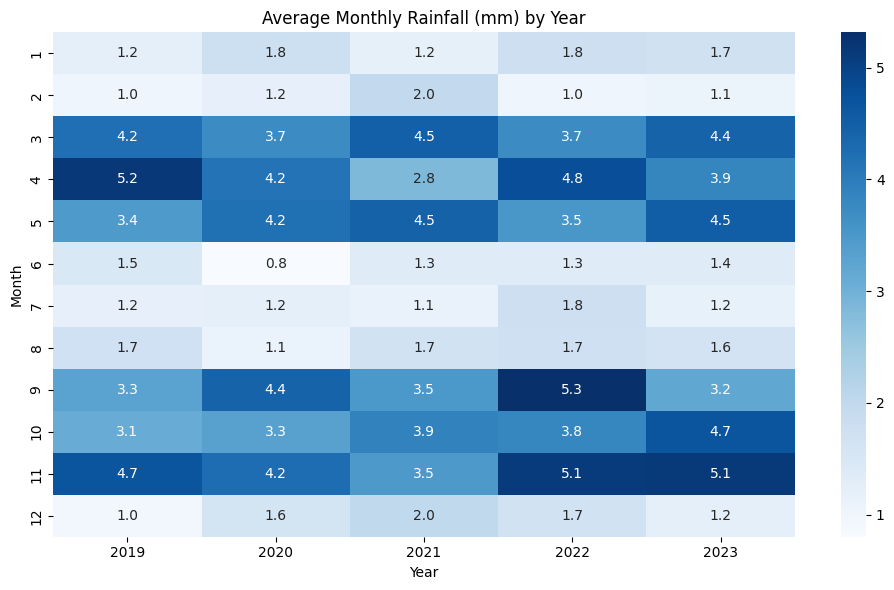

In [11]:
# Create a pivot table: rows = Month, columns = Year
pivot = df.pivot_table(values='Rainfall_mm', index='Month', columns='Year', aggfunc='mean')

# Plot it
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".1f")
plt.title('Average Monthly Rainfall (mm) by Year')
plt.ylabel('Month')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [12]:
df.to_excel("cleaned_nyagatare_weather.xlsx", index=False)
